## Gender based violence Project
Exploring gender based violence survey dataset.

This project looks at a survey that focused on "Violence against women and girls" in over 70 countries. The data was downloaded from kaggle link https://www.kaggle.com/andrewmvd/violence-against-women-and-girls. In this analysis I focus on answering three questions:
- Gender violence in Kenya
- what was the most common reason given in the survey as to why women were beaten?
- How do the two genders, male and female compare when it comes to supporting gender violence agaisnt women?
- what was the most common form of violence acts committed?

In [66]:
# loading the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

### Data Gathering

In [67]:
# looking at the data

df3 = pd.read_csv('violence_data.csv')
df3.head()


,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


### Assessing the Data


In [90]:

def explorer(data):
    '''
    INPUT:
    data - the pandas dataframe being explored
    '''
    
    shape = data.shape
    print("The dataset has {} rows and {} columns.\n" .format(shape[0], shape[1]))
    print("These 8 columns are described above and the data types they contain  ", data.info())
    
explorer(df)


The dataset has 12600 rows and 8 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB
These 8 columns are described above and the data types they contain   None


In [71]:
df.describe(include='all')

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
count,12600.000000,12600,12600,12600,12600,12600,12600,11187.000000
unique,NaN,70,2,5,15,6,18,NaN
top,NaN,Madagascar,F,Education,35-49,... if she refuses to have sex with him,01/01/2013,NaN
freq,NaN,180,6300,3360,840,2100,1980,NaN
mean,210.500000,NaN,NaN,NaN,NaN,NaN,NaN,19.762537
std,121.248024,NaN,NaN,NaN,NaN,NaN,NaN,16.986437
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,105.750000,NaN,NaN,NaN,NaN,NaN,NaN,6.200000
50%,210.500000,NaN,NaN,NaN,NaN,NaN,NaN,14.900000
75%,315.250000,NaN,NaN,NaN,NaN,NaN,NaN,29.200000


- The dataset is made up of 12600 rows and 8 columns. 
- there are 70 countries included in the survey.
- each respondent was asked 6 questions.


Next I explore the countries, questions and demographic questions covered in this study. 

In [72]:
df['Demographics Question'].unique()

array(['Marital status', 'Education', 'Employment', 'Age', 'Residence'],
      dtype=object)

In [73]:
print(df.Country.unique())

['Afghanistan' 'Albania' 'Angola' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Benin' 'Bolivia' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Chad'
 'Colombia' 'Comoros' 'Congo' 'Congo Democratic Republic' "Cote d'Ivoire"
 'Dominican Republic' 'Egypt' 'Eritrea' 'Eswatini' 'Ethiopia' 'Gabon'
 'Gambia' 'Ghana' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Jordan' 'Kenya' 'Kyrgyz Republic' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Maldives' 'Mali' 'Moldova' 'Morocco' 'Mozambique'
 'Myanmar' 'Namibia' 'Nepal' 'Nicaragua' 'Niger' 'Nigeria' 'Pakistan'
 'Peru' 'Philippines' 'Rwanda' 'Sao Tome and Principe' 'Senegal'
 'Sierra Leone' 'South Africa' 'Tajikistan' 'Tanzania' 'Timor-Leste'
 'Togo' 'Turkey' 'Turkmenistan' 'Uganda' 'Ukraine' 'Yemen' 'Zambia'
 'Zimbabwe']


In [74]:
df.Question.unique()

array(['... if she burns the food',
       '... for at least one specific reason',
       '... if she argues with him',
       '... if she goes out without telling him',
       '... if she neglects the children',
       '... if she refuses to have sex with him'], dtype=object)

In [75]:
Kenya_GV = df[df.Country == "Kenya"]
Kenya_GV.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
6120,385,Kenya,F,Age,15-24,... for at least one specific reason,01/01/2014,42.0
6121,385,Kenya,F,Age,25-34,... for at least one specific reason,01/01/2014,39.8
6122,385,Kenya,F,Age,35-49,... for at least one specific reason,01/01/2014,44.0
6123,105,Kenya,F,Age,15-24,... if she argues with him,01/01/2014,20.9
6124,105,Kenya,F,Age,25-34,... if she argues with him,01/01/2014,20.1


In [76]:
Kenya_graph = Kenya_GV[Kenya_GV['Demographics Question'] == 'Marital Status']
print(Kenya_graph)

Empty DataFrame
Columns: [RecordID, Country, Gender, Demographics Question, Demographics Response, Question, Survey Year, Value]
Index: []


### Visualizing

Text(0.5, 1.05, 'Kenyans agreeing a husband is justified in hitting his wife based on thier level of education')

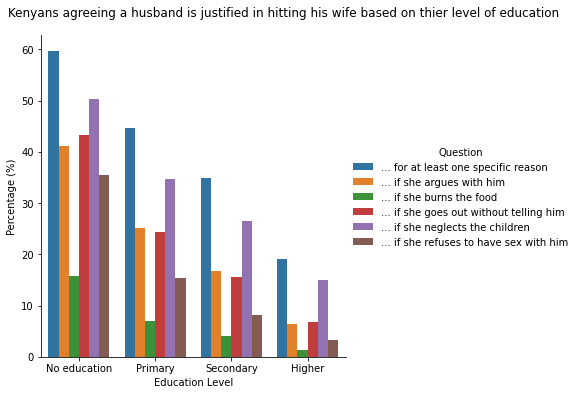

In [77]:
Kenya_graph = Kenya_GV[Kenya_GV['Demographics Question'] == 'Education']
Kenya_chart = sns.catplot(x = 'Demographics Response', y = 'Value', hue = 'Question',
                         order = ['No education', 'Primary', 'Secondary', 'Higher'],
                         data = Kenya_graph, kind = 'bar', ci=None)
Kenya_chart.set_axis_labels('Education Level', 'Percentage (%)')
Kenya_chart.fig.suptitle('Kenyans agreeing a husband is justified in hitting his wife based on thier level of education', y=1.05)

Next I visualise the gender violence in Kenya justification based on residence

Text(0.5, 1.05, 'Kenyans agreeing a husband is justified in hitting his wife based on where they reside')

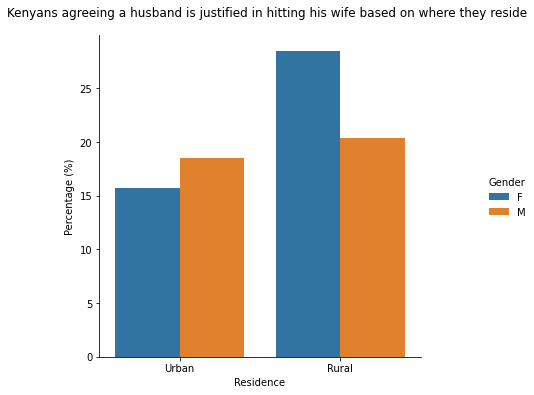

In [78]:
Kenya_graph = Kenya_GV[Kenya_GV['Demographics Question'] == 'Residence']
Kenya_chart = sns.catplot(x = 'Demographics Response', y = 'Value', hue = 'Gender',
                         order = ['Urban', 'Rural'],
                         data = Kenya_graph, kind = 'bar', ci=None)
Kenya_chart.set_axis_labels('Residence', 'Percentage (%)')
Kenya_chart.fig.suptitle('Kenyans agreeing a husband is justified in hitting his wife based on where they reside', y=1.05)

From the chart above it seem that more females in rural areas support that the husband is more justified to hit the woman for any of the listed reason while more men in urban centers support this ideology. males in rural areas are therefore more inclined towards not hitting the woman than the women are in this areas. the vice versa is true for those in urban residence.

Below I compare how age relates to how the women feel about their husbands being justified to hit them if they err.

Text(0.5, 1.05, 'kenyan women agreeing a husband is justified in hitting his wife vs, Age')

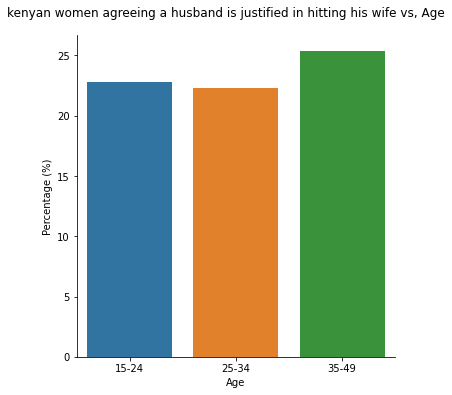

In [79]:
Kenya_graph = Kenya_GV[(Kenya_GV['Demographics Question'] == 'Age') & (Kenya_GV['Gender'] == 'F')]
Kenya_chart = sns.catplot(x='Demographics Response', y='Value',
                         data = Kenya_graph, kind='bar', ci=None)
Kenya_chart.set_axis_labels('Age', 'Percentage (%)')
Kenya_chart.fig.suptitle('kenyan women agreeing a husband is justified in hitting his wife vs, Age', y=1.05)

From the chart it looks like the younger women are agaisnt the husband hittign their wives while the older women, between 35-49 years are for the idea that the women should be hit if they err. 

Next I will compare Kenyan agreement with phillipines. The two countries are in differnt continents and difffernt economic development levels. 

In [80]:
compare_countries = df[(df.Country == "Kenya") | (df.Country == "Guatemala") | (df.Country == "Indonesia")]
compare_countries

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
4680,27,Guatemala,F,Education,Higher,... if she burns the food,01/01/2014,0.1
4681,27,Guatemala,F,Education,Secondary,... if she burns the food,01/01/2014,1.1
4682,27,Guatemala,F,Residence,Urban,... if she burns the food,01/01/2014,1.8
4683,27,Guatemala,F,Employment,Employed for cash,... if she burns the food,01/01/2014,3.2
4684,27,Guatemala,F,Age,25-34,... if she burns the food,01/01/2014,3.4
...,...,...,...,...,...,...,...,...
6295,175,Kenya,M,Residence,Urban,... if she goes out without telling him,01/01/2014,16.1
6296,245,Kenya,M,Residence,Rural,... if she neglects the children,01/01/2014,27.7
6297,245,Kenya,M,Residence,Urban,... if she neglects the children,01/01/2014,26.9
6298,315,Kenya,M,Residence,Rural,... if she refuses to have sex with him,01/01/2014,10.9


###### Now let's visualise this in a chart and see how the two countries compare

Text(0.5, 1.05, 'Those agreeing a husband is justified in hitting his wife and their education levels')

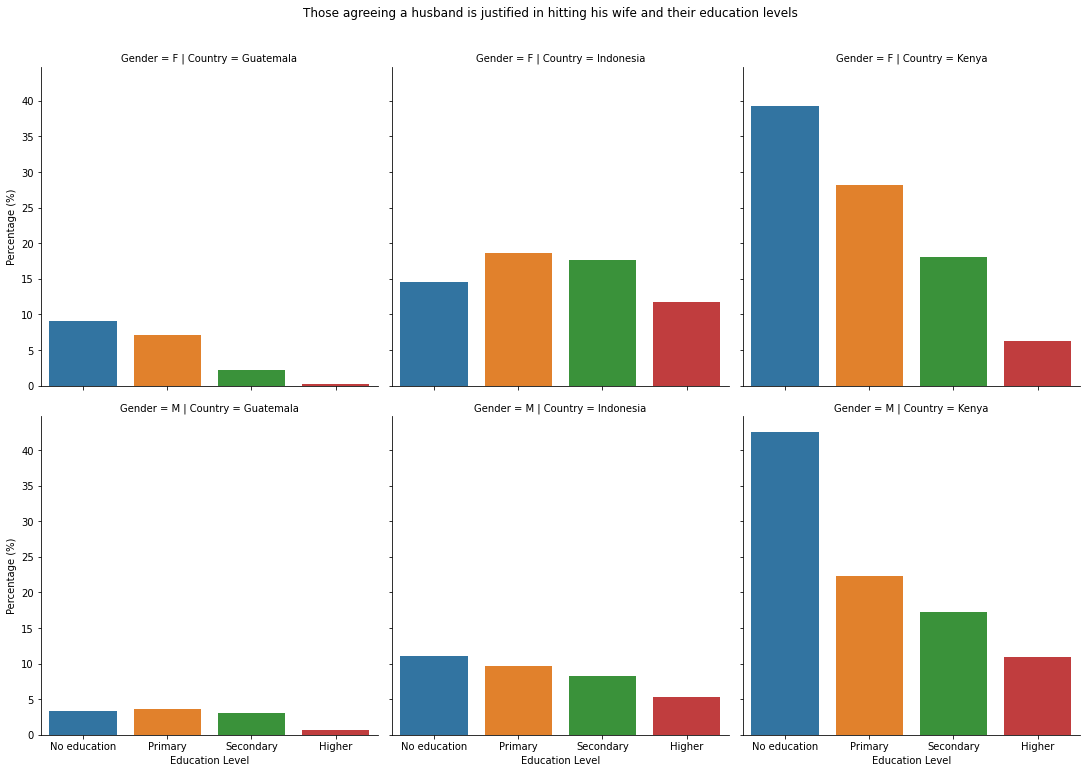

In [81]:
graph = compare_countries[compare_countries['Demographics Question'] == 'Education']

g = sns.catplot(x='Demographics Response', y='Value', col='Country', row='Gender',
               order = ["No education", "Primary", "Secondary", "Higher"],
               data=graph, kind='bar', ci=None)
g.set_axis_labels('Education Level', 'Percentage (%)')
g.fig.suptitle("Those agreeing a husband is justified in hitting his wife and their education levels", y=1.05)

Something interesting is notable from these charts and countries, while in kenya women with no education are in support of the husband being justified to hit a woman, in Indonesia, a substantial of women who are educated to primary evel and secondary supoort gender violence while those uneducated tend to not support it. This however can be attributed to the number of women who responded to the questions.